<a href="https://colab.research.google.com/github/RicStrong/GoogleJobs/blob/master/GoogleJobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Checking out Google job postings...
https://www.kaggle.com/niyamatalmass/google-job-skills

###Installing kaggle, downloading the data

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [2]:
!sudo -H pip3 install spacy
!python -m spacy download en_core_web_sm
!pip install --upgrade pip
!pip install textacy

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 1.5MB 7.6MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 206 kB 9.1 MB/s 
     |████████████████████████████████| 475 kB 31.8 MB/s 
     |████████████████████████████████| 3.0 MB 44.5 MB/s 
     |████████████████████████████████| 93 kB 2.5 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linux_x86_64.whl size=1233730 sha256=5c05ed0b2b2c5fc5f874d519e7735b983d03b1bc59f3be6378db7093357b07d0
  Stored in directory: /root/.cache/pip/wheels/ae/29/ee/95cfb685f2f524674eec78a249f3439b33bbef131529eccc35
Successfully built cytoolz


In [0]:
#Get the json file for the API key
from google.colab import files
files.upload()

In [0]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d niyamatalmass/google-job-skills

  0% 0.00/407k [00:00<?, ?B/s]
100% 407k/407k [00:00<00:00, 56.6MB/s]


In [6]:
!unzip \*.zip

Archive:  google-job-skills.zip
  inflating: job_skills.csv          


###Imports and loading the data

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [50]:
df = pd.read_csv('job_skills.csv')
df = df[['Responsibilities', 'Minimum Qualifications', 'Preferred Qualifications']]
df['new1'] = df['Responsibilities'] + " " + df['Minimum Qualifications'] + " " + df['Preferred Qualifications']
df = df['new1']
df

0       Shape, shepherd, ship, and show technical prog...
1       Drive cross-functional activities in the suppl...
2       Collect and analyze data to draw insight and i...
3       Work one-on-one with the top Android, iOS, and...
4       Plan requirements with internal customers.\nPr...
                              ...                        
1245    Develop protocols and practices to assess and ...
1246    Manage the daily operations of the security ve...
1247    Collaborate with functional teams; plan and ma...
1248    Partner closely with and offer guidance and co...
1249    Partner closely with and offer guidance and co...
Name: new1, Length: 1250, dtype: object

In [0]:
#Only 1% of some categories is missing, won't be an issue to drop empties
df = df.dropna()

In [0]:
text = df.str.cat(sep=' ')

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

In [57]:
len(text)

1742955

In [0]:
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 2000000

In [0]:
doc = nlp(text, disable = ['parser'])

In [61]:
goog_topics = []
for ent in doc.ents:
    if ent.label_ in ["ORG", "NORP", "PRODUCT", "EVENT", "WORK_OF_ART", "PERSON"]:
#         print(ent.text,ent.label_)
        goog_topics.append(ent.text.strip())

print(set(goog_topics))

{'Google Account', 'Linguistics', 'Slovak', 'LLB', 'RDMA', 'Digital Branding/Performance Marketing', 'SAR', 'MA/MS degree', 'REWS', 'Management Consulting', 'Led Training', 'Product/Program Managers', 'Engineering, Legal, Operations, Finance and Product Management', 'FPGA QoR', 'Integrate Google', 'Java\nFluency', 'EMC/ESD/Safety', 'Strategy Consulting', 'Fuel, Auto, Retail and Finance', 'Business, Economics, Statistics, Operations Research', 'Benefits and Google People Services Operations', 'SOX', 'the Play Merchandising Organization', 'Bahasa Melayu', 'Improve', 'Wi-Fi, Bluetooth, Cellular', 'Display', 'MATLAB', 'CPA/CA', 'ERS', 'GAAP', 'Prepare', 'Encryption', 'Computer Science or Information Systems', 'DevOps', 'Manufacturing/Assembly/Test', 'Manage', 'Capital Goods/Basics', 'Juniper', 'Legal IT', 'JasperGold', 'Rationalize', 'Media Agencies', 'Technical Solutions Engineering', 'Mediaplex', 'CPG', 'AdSense', 'Drive Google Technical Services', 'Google-caliber', 'Help Google', 'Maste

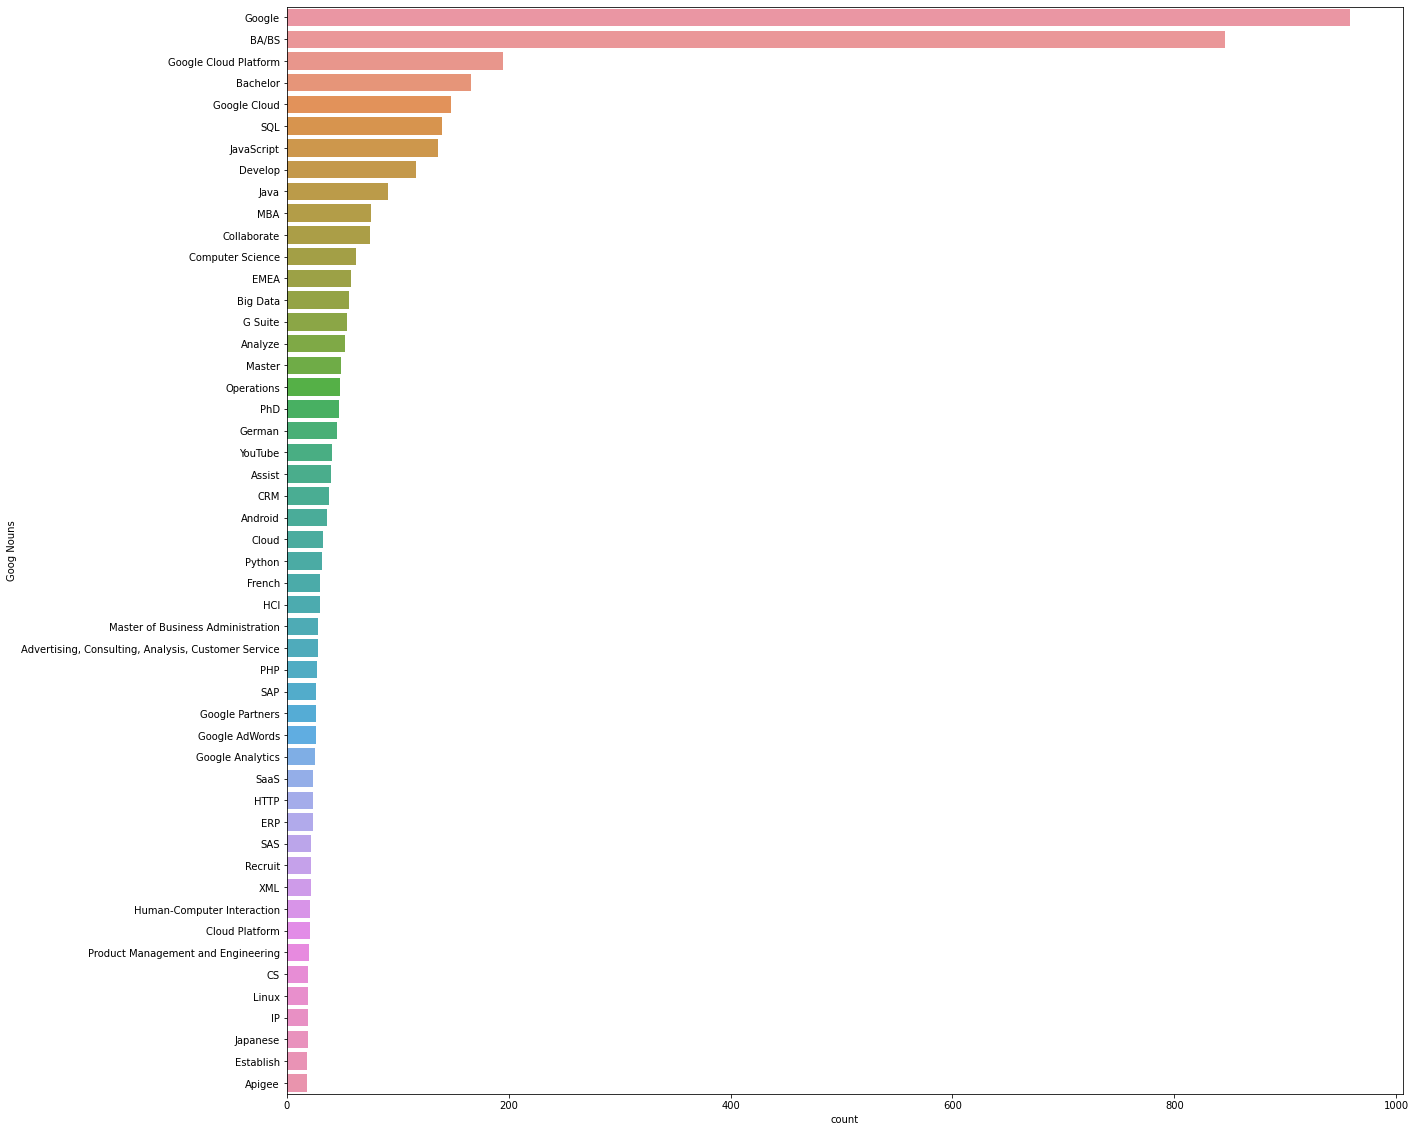

In [62]:
df_ttopics = pd.DataFrame(goog_topics, columns=["Goog Nouns"])
plt.figure(figsize=(20,20))
sns.countplot(y="Goog Nouns",
             data=df_ttopics,
             order=df_ttopics["Goog Nouns"].value_counts().iloc[0:50].index)
plt.show()

###Job Titles

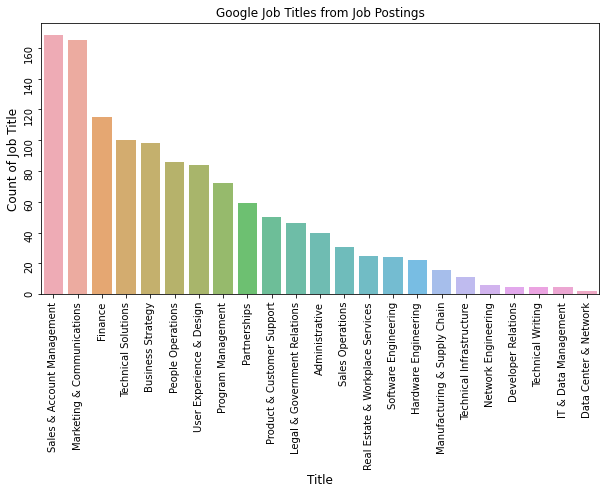

In [0]:
#Titles
title_count  = df['Title'].value_counts()
title_count = city_count[:25,]
plt.figure(figsize=(10,5))
sns.barplot(title_count.index, title_count.values, alpha=0.8, )
plt.title('Google Job Titles from Job Postings')
plt.ylabel('Count of Job Title', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.tick_params(rotation=90)
plt.show()

###Job Locations

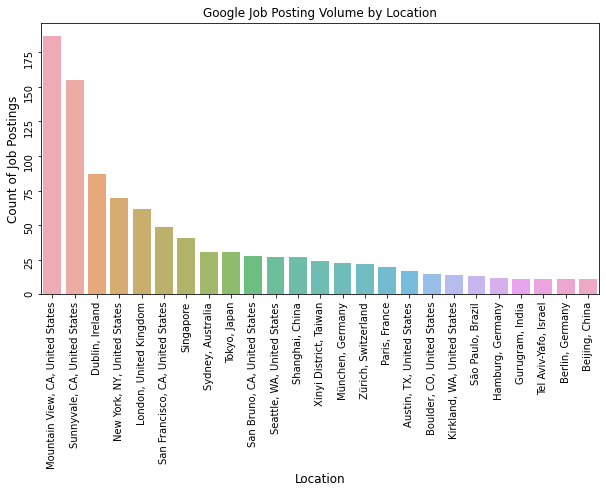

In [0]:
#Locations
city_count  = df['Location'].value_counts()
city_count = city_count[:25,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8, )
plt.title('Google Job Posting Volume by Location')
plt.ylabel('Count of Job Postings', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.tick_params(rotation=90)
plt.show()

###Job Categories

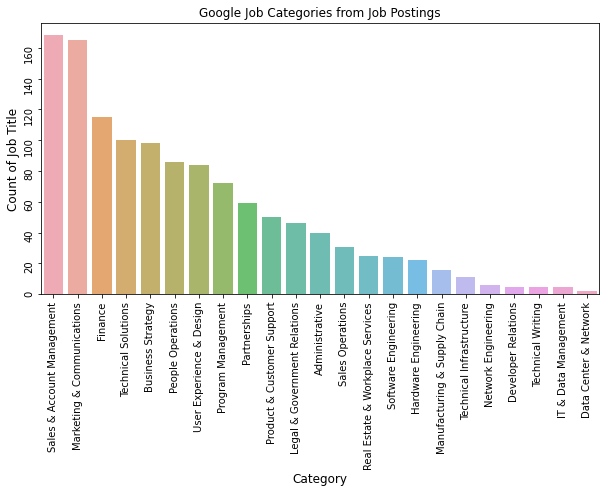

In [0]:
#Category
cat_count = df['Category'].value_counts()
cat_count = city_count[:25,]
plt.figure(figsize=(10,5))
sns.barplot(cat_count.index, cat_count.values, alpha=0.8, )
plt.title('Google Job Categories from Job Postings')
plt.ylabel('Count of Job Title', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.tick_params(rotation=90)
plt.show()

In [0]:
#Next up, explore some different visualizations, ex: relationship between title, location, category